In [1]:
#dataframes
import pandas as pd
import h5py

import sys
sys.path.append('../')
import odor_statistics_lib as osm

# user defined functions

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import signal
import scipy 
import scipy.stats as st
from scipy.stats import kurtosis

#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi

#misc

np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
# matplotlib.rcParams['font.family'] = [ 'sans-serif']
FS=7

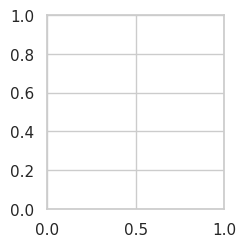

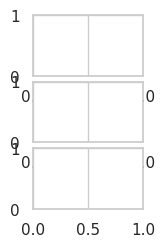

In [2]:
layout = fifi.svg_to_axes.FigureLayout('../../Figure/lpf.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [3]:
lpdf1=pd.read_hdf('../../data/derived_data/LpfHWSFiltered.h5')
lpdf2=pd.read_hdf('../../data/derived_data/LpfLWSFiltered.h5')
lpdf3=pd.read_hdf('../../data/derived_data/LpfForestFiltered.h5')

line_width=0.5
msize=3
ax=layout.axes[('fig1','lpf')]

ax.grid(False)
ax.plot(lpdf1.frequency,lpdf1.rsquared, label='WS>3.5m/s', c='b',linewidth=line_width,rasterized=True)
ax.plot(lpdf1.frequency,lpdf1.rsquared,'o',c='b',markerfacecolor="None", markeredgecolor='b', markersize=msize,rasterized=True)

ax.plot(lpdf2.frequency,lpdf2.rsquared, label='WS<3.5m/s',c='g',linewidth=line_width,rasterized=True)
ax.plot(lpdf2.frequency,lpdf2.rsquared,'o', c='g', markersize=msize,markerfacecolor="None", markeredgecolor='g',rasterized=True)

ax.plot(lpdf3.frequency,lpdf3.rsquared, label='Forest',c='purple',linewidth=line_width,rasterized=True)
ax.plot(lpdf3.frequency,lpdf3.rsquared,'o',c='purple',markerfacecolor="None", markeredgecolor='purple',markersize=msize,rasterized=True)

ax.set_rasterization_zorder(-20)

ax.set_xlabel('Cutoff Frequency (hz)')
ax.xaxis.set_label_coords(0.5, -0.13)
ax.set_ylabel('$R^2$',rotation=0)
ax.yaxis.set_label_coords(-0.08, 0.45)


mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left':4,'bottom':4}, 
                            smart_bounds=True,
                            xticks=[2,10,20,30,40,50,60,70,80,90],
                            yticks = [0,0.8],
                            linewidth=0.5)

# ax.set_xticklabels(cutoff,rotation=90)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure/lpf.svg')

In [4]:
df=pd.read_hdf('../../data/derived_data/1hz.h5')
ax=layout.axes[('fig2','a1')]

ax.plot(df.time,df.odor,c='b',rasterized=True, linewidth=0.6)
ax.grid(False)
ax.set_xlim(211,212)
ax.set_ylim(0,11)
ax.set_rasterization_zorder(-20)


ax.set_ylabel('Odor, a.u.')
ax.yaxis.set_label_coords(-0.2, 0.45)

mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left':4,'bottom':5}, 
                            smart_bounds=True,
                            xticks=[211,212],
                            yticks = [0,10],
                            linewidth=0.5)
# ax.set_xticklabels([0,1])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure/lpf.svg')

In [11]:
df=pd.read_hdf('../../data/derived_data/10hz.h5')
ax=layout.axes[('fig2','a2')]

ax.plot(df.time,df.odor,c='b',rasterized=True, linewidth=0.6)
ax.grid(False)
ax.set_xlim(211,212)
ax.set_ylim(0,11)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['none'],
                            spine_locations={'left':4,'bottom':4}, 
                            smart_bounds=True,
                            xticks=[211,212],
                            yticks = [0,10],
                            linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure/lpf.svg')

In [6]:
df=pd.read_hdf('../../data/derived_data/60hz.h5')

ax=layout.axes[('fig2','a3')]

ax.plot(df.time,df.odor,c='b',rasterized=True, linewidth=0.6)
ax.grid(False)
ax.set_xlim(211,212)
ax.set_ylim(0,11)
ax.set_rasterization_zorder(-20)
ax.set_xlabel('Time,s')
ax.xaxis.set_label_coords(0.5, -0.15)

mpl_functions.adjust_spines(ax,['bottom'],
                            spine_locations={'left':4,'bottom':4}, 
                            smart_bounds=True,
                            xticks=[211,212],
                            yticks = [0,10],
                            linewidth=0.5)
ax.set_xticklabels([0,1])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure/lpf.svg')